<a href="https://colab.research.google.com/github/ColtdayVal/Clima_Australia/blob/main/Primera_Entrega_Melisa_Valeria_Beltran_Garzon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Historia Climatica de Australia desde el 2007 hasta el 2017.


Este informe lo dividiremos en dos partes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar el archivo CSV en un DataFrame
file_url='https://raw.githubusercontent.com/ColtdayVal/Clima_Australia/refs/heads/main/Clima%20Australia.csv'
df=pd.read_csv(file_url, sep=';')

# Descripcion de los datos
Lo primero que haremos es entender los datos, asi que vamos a describir cada uno de los siguientes datos que encontraremos a continuación del dataset.

* Date=La fecha de observación
* Location=El nombre común de la
  ubicación de la estación meteorológica.
* Latitud=Latitud de la ubicación.
* Longitud=Longitud de la ubicación.
* MinTemp=La temperatura mínima en grados centígrados
* MaxTemp=La temperatura máxima en grados centígrados
* Rainfall=La cantidad de lluvia registrada durante el día en mm.
* Evaporation=La denominada evaporación en tanque de clase A (mm) en las 24 horas hasta las 9 a. m.
* Sunshine=El número de horas de sol brillante en el día.
* WindGustDir=La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche.
* WindGustSpeed=La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
* WindDir9am=Dirección del viento a las 9 am
* WindDir3pm=Dirección del viento a las 15h
* WindSpeed9am=Velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 a. m.
* WindSpeed3pm=Velocidad del viento (km/h) promediada durante 10 minutos antes de las 3 p. m.
* Humidity9am=Humedad (porcentaje) a las 9 am
* Humidity3pm=Humedad (porcentaje) a las 3 p. m.
* Pressure9am=La presión atmosférica (hpa) se redujo al nivel medio del mar a las 9 am
* Pressure3pm=La presión atmosférica (hpa) se redujo al nivel medio del mar a las 3 p. m.
* Cloud9am=Fracción del cielo oscurecida por nubes a las 9:00 h. Se mide en "oktas", que son una unidad de octavos.
Registra cuántas octavas partes del cielo están oscurecidas por nubes. Un 0 indica que el cielo está completamente despejado, mientras que un 8 indica que está completamente nublado.
* Cloud3pm=Fracción del cielo oscurecida por las nubes (en "oktas": octavos) a las 15 h. Véase Cload9am para una descripción de los valores.
* Temp9am=Temperatura (grados C) a las 9 am.
* Temp3pm=Temperatura (grados C) a las 3pm.
* RainToday=Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9 a. m. supera 1 mm, de lo contrario 0.
* RainTomorrow=Cantidad de lluvia del día siguiente en mm. Se utiliza para crear la variable de respuesta RainTomorrow. Una especie de medida del "riesgo".


In [2]:
# Mostrar las primeras filas del DataFrame para entender su estructura
df.head()

,Date,Location,Latitud,Longitud,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/11/2007,Canberra,-3.528.346,14.912.807,8.0,24.3,0.0,3.4,6.3,NW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
1,2/11/2007,Canberra,-3.528.346,14.912.807,14.0,26.9,3.6,4.4,9.7,ENE,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
2,3/11/2007,Canberra,-3.528.346,14.912.807,13.7,23.4,3.6,5.8,3.3,NW,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
3,4/11/2007,Canberra,-3.528.346,14.912.807,13.3,15.5,39.8,7.2,9.1,NW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
4,5/11/2007,Canberra,-3.528.346,14.912.807,7.6,16.1,2.8,5.6,10.6,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


Visualizacion de filas y columnas

In [3]:
#Cuantos campos y registros tiene la base de datos
df.shape

(145460, 25)

In [5]:
#columnas del dataset
df.columns

Index(['Date', 'Location', 'Latitud', 'Longitud', 'MinTemp', 'MaxTemp',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Cuantos registros para cada campo son nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   Latitud        145460 non-null  object 
 3   Longitud       145460 non-null  object 
 4   MinTemp        143975 non-null  float64
 5   MaxTemp        144199 non-null  float64
 6   Rainfall       142199 non-null  float64
 7   Evaporation    82670 non-null   float64
 8   Sunshine       75625 non-null   float64
 9   WindGustDir    135134 non-null  object 
 10  WindGustSpeed  135197 non-null  float64
 11  WindDir9am     134894 non-null  object 
 12  WindDir3pm     141232 non-null  object 
 13  WindSpeed9am   143693 non-null  float64
 14  WindSpeed3pm   142398 non-null  float64
 15  Humidity9am    142806 non-null  float64
 16  Humidity3pm    140953 non-null  float64
 17  Pressure9am    130395 non-nul

In [7]:
#Mostrar el tipo de datos que tiene cada campo
df.dtypes

,0
Date,object
Location,object
Latitud,object
Longitud,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object


In [8]:
#Mostrar los campos tipo Variables cualitativas:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Date', 'Location', 'Latitud', 'Longitud', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [9]:
#Mostrar los campos tipo Variables cuantitativas:
quantitative = df.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


# Descripción de los datos


In [10]:
#Descripción de las variables cuantitativas
df[quantitative].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,1.304320e+05,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1.030776e+03,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,3.963418e+03,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,9.771000e+02,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1.010400e+03,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1.015200e+03,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1.020000e+03,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1.016777e+06,9.000000,9.000000,40.200000,46.70000


# **Manipulación de datos**

# Transformación de la fecha
Sacar del campo Date, el año (year), mes (month), dia (day)

In [11]:
#Transformar el campo 'Date':
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

,Date,Location,Latitud,Longitud,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2007-11-01,Canberra,-3.528.346,14.912.807,8.0,24.3,0.0,3.4,6.3,NW,...,1015.0,7.0,7.0,14.4,23.6,No,Yes,2007,11,1
1,2007-11-02,Canberra,-3.528.346,14.912.807,14.0,26.9,3.6,4.4,9.7,ENE,...,1008.4,5.0,3.0,17.5,25.7,Yes,Yes,2007,11,2
2,2007-11-03,Canberra,-3.528.346,14.912.807,13.7,23.4,3.6,5.8,3.3,NW,...,1007.2,8.0,7.0,15.4,20.2,Yes,Yes,2007,11,3
3,2007-11-04,Canberra,-3.528.346,14.912.807,13.3,15.5,39.8,7.2,9.1,NW,...,1007.0,2.0,7.0,13.5,14.1,Yes,Yes,2007,11,4
4,2007-11-05,Canberra,-3.528.346,14.912.807,7.6,16.1,2.8,5.6,10.6,SSE,...,1018.5,7.0,7.0,11.1,15.4,Yes,No,2007,11,5


# Data Wrangling

# **Identificación de Valores Nulos**


In [12]:
#Identificación de valores perdidos
valores_perdidos = df.isnull().sum()
print("Valores perdidos por columna:\n", valores_perdidos)

Valores perdidos por columna:
 Date                 0
Location             0
Latitud              0
Longitud             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
year                 0
month                0
day                  0
dtype: int64


In [13]:
valores_perdidos_cuantitativos=df[quantitative].isnull().sum()
print("Valores perdidos por columna:\n", valores_perdidos_cuantitativos)

Valores perdidos por columna:
 MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64


In [14]:
df[quantitative].isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654
Humidity3pm,4507


# **Imputación de datos nulos**

No tenemos en cuenta los valores ceros por que hay a pesar de que hay valores en cero para las variables hay que tener en cuenta que el contexto de estos campos, por lo tanto, es normal que haya valores ceros en los datos

In [15]:
#borrar registros con datos nulos
df_clean = df.dropna()
df_clean

,Date,Location,Latitud,Longitud,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2007-11-01,Canberra,-3.528.346,14.912.807,8.0,24.3,0.0,3.4,6.3,NW,...,1015.0,7.0,7.0,14.4,23.6,No,Yes,2007,11,1
1,2007-11-02,Canberra,-3.528.346,14.912.807,14.0,26.9,3.6,4.4,9.7,ENE,...,1008.4,5.0,3.0,17.5,25.7,Yes,Yes,2007,11,2
2,2007-11-03,Canberra,-3.528.346,14.912.807,13.7,23.4,3.6,5.8,3.3,NW,...,1007.2,8.0,7.0,15.4,20.2,Yes,Yes,2007,11,3
3,2007-11-04,Canberra,-3.528.346,14.912.807,13.3,15.5,39.8,7.2,9.1,NW,...,1007.0,2.0,7.0,13.5,14.1,Yes,Yes,2007,11,4
4,2007-11-05,Canberra,-3.528.346,14.912.807,7.6,16.1,2.8,5.6,10.6,SSE,...,1018.5,7.0,7.0,11.1,15.4,Yes,No,2007,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145433,2017-06-25,Melbourne,-37.814,14.496.332,8.6,14.3,0.0,2.8,3.8,NW,...,1015.0,7.0,7.0,9.3,13.4,No,Yes,2017,6,25
145437,2017-06-25,Watsonia,-3.771.667,14.508.333,7.9,13.0,0.0,2.8,3.8,NNW,...,1015.3,7.0,7.0,9.0,11.7,No,No,2017,6,25
145439,2017-06-25,Brisbane,-2.746.794,15.302.809,11.0,24.2,0.0,2.2,9.8,ENE,...,1017.3,6.0,3.0,15.9,22.6,No,No,2017,6,25
145450,2017-06-25,PerthAirport,-33.75,150.7,4.9,16.8,0.0,1.6,7.9,E,...,1026.0,1.0,3.0,12.0,16.2,No,No,2017,6,25


a pesar de que hay valores en cero para las variables hay que tener en cuenta que el contexto de estos campos, por lo tanto, es normal que haya valores ceros en los datos

Como podemos ver si eliminamos los registros con campos vacios nos quedan 56420 registros de 145460



In [16]:
df_clean.shape

(56420, 28)

Por otro lado, identificamos campos irregulares mediante el uso de los histogramas para identificar cuales datos nos puede ayudar

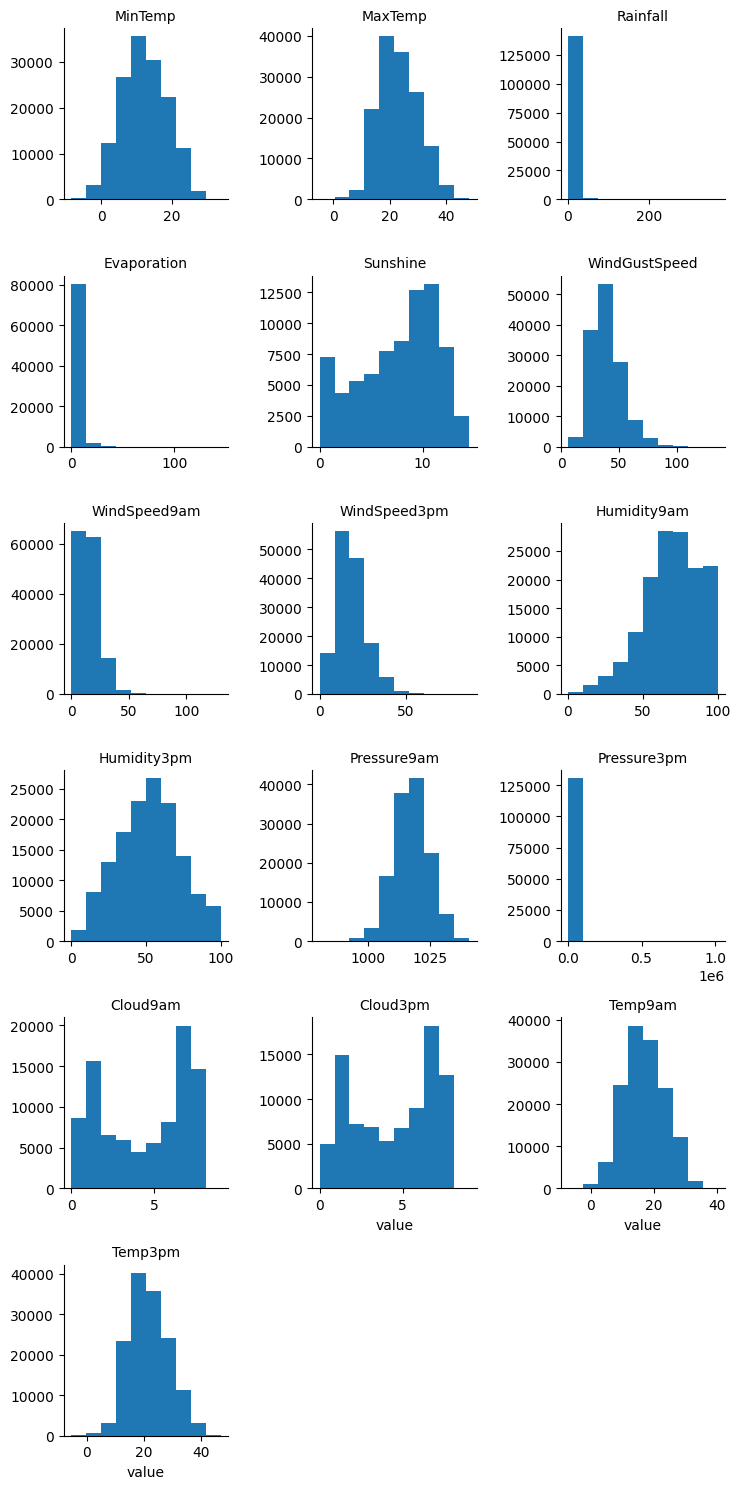

In [17]:
#Identificar valores irregulares mediante el uso de histogramas
#Mostrar histogramas de las variables cuantitativas:
g = sns.FacetGrid(df.melt(value_vars=quantitative), col='variable', col_wrap=3, sharex=False, sharey=False, height=2.5)
g.map(plt.hist, 'value')
g.set_titles("{col_name}")
plt.show()
#plt.figure(figsize=(15, 15))
#df[quantitative].hist()

In [21]:
#eliminar campo Pressure3pm
df=df.drop('Pressure3pm', axis=1)

Utilizamos el metodo SimpleImputer para poner la media de los registros cuantitativos, pero debemos tener en cuenta otros datos como el mes el dia la locacion

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
# 1. Crear un numpy array con los valores
valores = df[quantitative].values
# 2. Definir el imputador
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')
# 3. transformar el dataset
transformados = imputador.fit_transform(valores)
# 4.Contar el numero de NaN en cada columna
print('Missing: %d' % np.isnan(transformados).sum())
# 5. Transformar array en DataFrame
transformados=pd.DataFrame(transformados)
#transformados= transformados.rename(columns={0: "NEMB", 1: "GLU", 2: "PART",3:"GROS",4:"HUR",5:"BMI",6:"FPRED",7:"AGE",8:"CLASS"})
print(transformados.head().round(2))

Missing: 0
     0     1     2    3     4     5     6     7     8     9       10      11  \
0   8.0  24.3   0.0  3.4   6.3  30.0   6.0  20.0  68.0  29.0  1019.7  1015.0   
1  14.0  26.9   3.6  4.4   9.7  39.0   4.0  17.0  80.0  36.0  1012.4  1008.4   
2  13.7  23.4   3.6  5.8   3.3  85.0   6.0   6.0  82.0  69.0  1009.5  1007.2   
3  13.3  15.5  39.8  7.2   9.1  54.0  30.0  24.0  62.0  56.0  1005.5  1007.0   
4   7.6  16.1   2.8  5.6  10.6  50.0  20.0  28.0  68.0  49.0  1018.3  1018.5   

    12   13    14    15  
0  7.0  7.0  14.4  23.6  
1  5.0  3.0  17.5  25.7  
2  8.0  7.0  15.4  20.2  
3  2.0  7.0  13.5  14.1  
4  7.0  7.0  11.1  15.4  


In [20]:
transformados

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,8.000000,24.300000,0.000000,3.400000,6.300000,30.00000,6.0,20.0,68.000000,29.000000,1019.70000,1015.000000,7.000000,7.00000,14.400000,23.60000
1,14.000000,26.900000,3.600000,4.400000,9.700000,39.00000,4.0,17.0,80.000000,36.000000,1012.40000,1008.400000,5.000000,3.00000,17.500000,25.70000
2,13.700000,23.400000,3.600000,5.800000,3.300000,85.00000,6.0,6.0,82.000000,69.000000,1009.50000,1007.200000,8.000000,7.00000,15.400000,20.20000
3,13.300000,15.500000,39.800000,7.200000,9.100000,54.00000,30.0,24.0,62.000000,56.000000,1005.50000,1007.000000,2.000000,7.00000,13.500000,14.10000
4,7.600000,16.100000,2.800000,5.600000,10.600000,50.00000,20.0,28.0,68.000000,49.000000,1018.30000,1018.500000,7.000000,7.00000,11.100000,15.40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.800000,12.800000,0.000000,5.468232,7.611178,50.00000,15.0,17.0,84.000000,73.000000,1017.64994,1030.775897,8.000000,8.00000,9.400000,12.40000
145456,9.600000,23.221348,0.000000,5.468232,7.611178,40.03523,6.0,17.0,36.000000,19.000000,1021.40000,1017.500000,1.000000,1.00000,15.600000,26.30000
145457,19.300000,23.221348,0.000000,5.000000,7.611178,40.03523,13.0,17.0,68.000000,45.000000,1013.90000,1010.700000,6.000000,1.00000,24.600000,29.00000
145458,12.194034,23.221348,2.360918,5.468232,7.611178,40.03523,9.0,17.0,68.880831,51.539116,1014.90000,1011.700000,4.447461,4.50993,16.990631,21.68339


In [21]:
transformados= transformados.rename(columns={0: "MinTemp", 1: "MaxTemp", 2: "PART",3:"Rainfall",4:"Evaporation",5:"Sunshine",6:"WindGustSpeed",7:"WindSpeed9am",8:"WindSpeed3pm", 9:"Humidity9am",10:"Humidity3pm",11:"Pressure9am",12:"Cloud9am",13:"Cloud3pm",14:"Temp9am",15:"Temp3pm"})
transformados

,MinTemp,MaxTemp,PART,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,8.000000,24.300000,0.000000,3.400000,6.300000,30.00000,6.0,20.0,68.000000,29.000000,1019.70000,1015.000000,7.000000,7.00000,14.400000,23.60000
1,14.000000,26.900000,3.600000,4.400000,9.700000,39.00000,4.0,17.0,80.000000,36.000000,1012.40000,1008.400000,5.000000,3.00000,17.500000,25.70000
2,13.700000,23.400000,3.600000,5.800000,3.300000,85.00000,6.0,6.0,82.000000,69.000000,1009.50000,1007.200000,8.000000,7.00000,15.400000,20.20000
3,13.300000,15.500000,39.800000,7.200000,9.100000,54.00000,30.0,24.0,62.000000,56.000000,1005.50000,1007.000000,2.000000,7.00000,13.500000,14.10000
4,7.600000,16.100000,2.800000,5.600000,10.600000,50.00000,20.0,28.0,68.000000,49.000000,1018.30000,1018.500000,7.000000,7.00000,11.100000,15.40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.800000,12.800000,0.000000,5.468232,7.611178,50.00000,15.0,17.0,84.000000,73.000000,1017.64994,1030.775897,8.000000,8.00000,9.400000,12.40000
145456,9.600000,23.221348,0.000000,5.468232,7.611178,40.03523,6.0,17.0,36.000000,19.000000,1021.40000,1017.500000,1.000000,1.00000,15.600000,26.30000
145457,19.300000,23.221348,0.000000,5.000000,7.611178,40.03523,13.0,17.0,68.000000,45.000000,1013.90000,1010.700000,6.000000,1.00000,24.600000,29.00000
145458,12.194034,23.221348,2.360918,5.468232,7.611178,40.03523,9.0,17.0,68.880831,51.539116,1014.90000,1011.700000,4.447461,4.50993,16.990631,21.68339


In [22]:
df

,Date,Location,Latitud,Longitud,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2007-11-01,Canberra,-3.528.346,14.912.807,8.0,24.3,0.0,3.4,6.3,NW,...,1015.0,7.0,7.0,14.4,23.6,No,Yes,2007,11,1
1,2007-11-02,Canberra,-3.528.346,14.912.807,14.0,26.9,3.6,4.4,9.7,ENE,...,1008.4,5.0,3.0,17.5,25.7,Yes,Yes,2007,11,2
2,2007-11-03,Canberra,-3.528.346,14.912.807,13.7,23.4,3.6,5.8,3.3,NW,...,1007.2,8.0,7.0,15.4,20.2,Yes,Yes,2007,11,3
3,2007-11-04,Canberra,-3.528.346,14.912.807,13.3,15.5,39.8,7.2,9.1,NW,...,1007.0,2.0,7.0,13.5,14.1,Yes,Yes,2007,11,4
4,2007-11-05,Canberra,-3.528.346,14.912.807,7.6,16.1,2.8,5.6,10.6,SSE,...,1018.5,7.0,7.0,11.1,15.4,Yes,No,2007,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-25,Launceston,-4.143.876,14.713.467,1.8,12.8,0.0,NaN,NaN,NW,...,NaN,8.0,8.0,9.4,12.4,No,No,2017,6,25
145456,2017-06-25,AliceSprings,-2.369.748,13.388.362,9.6,NaN,0.0,NaN,NaN,NaN,...,1017.5,1.0,1.0,15.6,26.3,No,NaN,2017,6,25
145457,2017-06-25,Darwin,-1.246.113,13.084.185,19.3,NaN,0.0,5.0,NaN,NaN,...,1010.7,6.0,1.0,24.6,29.0,No,NaN,2017,6,25
145458,2017-06-25,Katherine,-1.446.517,13.226.347,NaN,NaN,NaN,NaN,NaN,NaN,...,1011.7,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,25


Las siguientes variables tienen valores nulos
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267


In [23]:
df[quantitative].isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654
Humidity3pm,4507


In [29]:
df.groupby("Location").count()

,Date,Latitud,Longitud,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3193,3193,3191,3190,3091,1704,1769,3167,3167,...,3186,0,0,3188,3189,3091,3090,3193,3193,3193
Albany,3040,3040,3040,2977,2986,3016,2750,2520,0,0,...,3015,3002,2329,3001,2328,3016,3016,3040,3040,3040
Albury,3040,3040,3040,3029,3029,3011,0,0,3008,3008,...,3032,1289,1427,3031,3032,3011,3011,3040,3040,3040
AliceSprings,3040,3040,3040,3039,3038,3032,2825,2520,2989,2989,...,3037,2706,2679,3040,3038,3032,3031,3040,3040,3040
BadgerysCreek,3009,3009,3009,2973,2980,2928,0,0,2933,2933,...,2836,0,0,2968,2965,2928,2928,3009,3009,3009
Ballarat,3040,3040,3040,3039,3039,3028,0,0,3009,3009,...,3014,2494,1992,3028,3034,3028,3028,3040,3040,3040
Bendigo,3040,3040,3040,3038,3035,3034,1185,0,2999,3000,...,3030,2072,2268,3037,3038,3034,3034,3040,3040,3040
Brisbane,3193,3193,3193,3184,3179,3161,3174,3144,3152,3152,...,3185,3192,3191,3189,3178,3161,3161,3193,3193,3193
Cairns,3040,3040,3040,3039,3040,2988,2670,2564,3021,3022,...,3040,2833,2810,3039,3040,2988,2988,3040,3040,3040


Como vemos en la anterior agrupacion hay ciudades que no tienen valores en ciertos campos, por lo tanto vamos a determinar que campos realmente utilizaremos del dataset para nuestra investigacion y luego eliminaremos las ciudades que no los tengan datos o tengan mas del 50% de los datos sean nulos

In [28]:
from typing import Counter
from itertools import groupby
groupby(df['Location'], key=lambda x: x)
# You likely want to count the occurrences of each location afterwards, for example:
# from collections import Counter
# Counter(df['Location'])
Counter(groupby(df['Location'], key=lambda x: x))

Counter({('Canberra', <itertools._grouper at 0x7934b9b222c0>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b23670>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b23850>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b23be0>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b22bf0>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b22ef0>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b23ac0>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b232b0>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b20160>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b23550>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b23e20>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b229e0>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b209d0>): 1,
         ('Sydney', <itertools._grouper at 0x7934b9b23bb0>): 1,
         ('Canberra', <itertools._grouper at 0x7934b9b20370>): 1,
         ('Sydney', <ite